In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Conv2D, Dense, Dropout, MaxPooling1D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop
# from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [216]:
df = pd.read_csv("sensor-nodes.csv")
df.head(10)


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-2023 00:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-2023 00:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-2023 00:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-2023 00:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-2023 00:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0
5,6,01-02-2023 00:05,192.168.230.20,42.539308,1.777329,1.226797,140.306629,-48.164891,22.562783,80.792853,...,3,9.100424,10.912167,17.039896,17.098904,0.095630,41.592922,37.011924,135.173141,0
6,7,01-02-2023 00:06,192.168.201.178,34.371305,2.122728,1.238309,82.759149,-46.749541,22.199859,83.896476,...,5,5.514884,9.764031,14.729525,14.537270,0.112991,51.911647,33.413317,113.722314,0
7,8,01-02-2023 00:07,192.168.0.73,39.421713,1.632756,1.070672,128.744279,-47.965449,22.017101,73.018853,...,3,8.785059,7.424502,14.028956,16.584326,0.150733,43.373535,32.514071,101.301618,0
8,9,01-02-2023 00:08,192.168.35.14,64.392638,1.771348,0.614431,105.554913,-45.030005,19.406187,100.505321,...,4,9.652375,9.578266,20.649000,13.220874,0.133769,41.662683,36.024818,130.214575,0
9,10,01-02-2023 00:09,192.168.94.186,71.586404,2.874885,1.175556,109.901877,-43.949902,27.354364,76.642262,...,3,8.413089,14.570255,15.308871,14.962364,0.088105,39.467362,31.086755,130.360976,0


In [217]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [218]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [219]:
# LSTM
X_train_val_lstm, X_test_lstm, y_train_val_lstm, y_test_lstm = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_val_lstm, y_train_val_lstm, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train_lstm.shape)
print("Shape of X_val:", X_val_lstm.shape)
print("Shape of X_test:", X_test_lstm.shape)
print("Shape of y_train:", y_train_lstm.shape)
print("Shape of y_val:", y_val_lstm.shape)
print("Shape of y_test:", y_test_lstm.shape)


Shape of X_train: (6000, 17)
Shape of X_val: (2000, 17)
Shape of X_test: (2000, 17)
Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [220]:
sequence_length = X_train_lstm.shape[1]
num_features = 1

X_train_reshaped_lstm = np.expand_dims(X_train_lstm, axis=-1)
X_val_reshaped_lstm = np.expand_dims(X_val_lstm, axis=-1)
X_test_reshaped_lstm = np.expand_dims(X_test_lstm, axis=-1)

print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)


Sequence length:  17
Num of features:  1


In [221]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(sequence_length, num_features),
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
lstm_model.add(Dropout(0.5))


In [222]:
# Adam Optimizer
lstm_adam_optimizer = Adam(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_adam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_adam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                   epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30


188/188 [==============================] - 4s 11ms/step - loss: 0.4888 - accuracy: 0.1348 - val_loss: 0.0494 - val_accuracy: 0.0020
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3969 - accuracy: 0.3938 - val_loss: 0.0242 - val_accuracy: 5.0000e-04
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3883 - accuracy: 0.4265 - val_loss: 0.0199 - val_accuracy: 5.0000e-04
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3861 - accuracy: 0.4535 - val_loss: 0.0178 - val_accuracy: 5.0000e-04
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3811 - accuracy: 0.4532 - val_loss: 0.0122 - val_accuracy: 0.0175
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3862 - accuracy: 0.4415 - val_loss: 0.0114 - val_accuracy: 0.0010
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3919 - accuracy: 0.4542 - val_loss: 0.0126 - val_accuracy: 0.0025
Epoc

In [223]:
lstm_nadam_optimizer = Nadam(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_nadam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_nadam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30


188/188 [==============================] - 3s 7ms/step - loss: 0.4145 - accuracy: 0.4103 - val_loss: 0.0675 - val_accuracy: 0.0105
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.4098 - accuracy: 0.3645 - val_loss: 0.0653 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.4130 - accuracy: 0.4655 - val_loss: 0.0689 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.4113 - accuracy: 0.4062 - val_loss: 0.0645 - val_accuracy: 5.0000e-04
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.4124 - accuracy: 0.4647 - val_loss: 0.0626 - val_accuracy: 0.0040
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.4074 - accuracy: 0.4672 - val_loss: 0.0643 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.4178 - accuracy: 0.4760 - val_loss: 0.0639 - val_accuracy: 0.0000e+

In [224]:
lstm_adagrad_optimizer = Adagrad(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_adagrad_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_adagrad_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                      epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 0.3965 - accuracy: 0.4757 - val_loss: 0.0319 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3946 - accuracy: 0.4735 - val_loss: 0.0318 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3905 - accuracy: 0.4680 - val_loss: 0.0316 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3874 - accuracy: 0.4687 - val_loss: 0.0316 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3923 - accuracy: 0.4737 - val_loss: 0.0316 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3877 - accuracy: 0.4792 - val_loss: 0.0316 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3914 - accuracy: 0.4630 - val_loss: 0.0316 - val

In [225]:
lstm_sgd_optimizer = SGD(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_sgd_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_sgd_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30


188/188 [==============================] - 3s 7ms/step - loss: 0.3908 - accuracy: 0.4657 - val_loss: 0.0315 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3933 - accuracy: 0.4825 - val_loss: 0.0315 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3911 - accuracy: 0.4770 - val_loss: 0.0315 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3956 - accuracy: 0.4688 - val_loss: 0.0315 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3904 - accuracy: 0.4757 - val_loss: 0.0315 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3924 - accuracy: 0.4740 - val_loss: 0.0315 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3958 - accuracy: 0.4752 - val_loss: 0.0315 - val_accuracy: 

In [226]:
lstm_rms_optimizer = RMSprop(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_rms_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_rms_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30


188/188 [==============================] - 3s 7ms/step - loss: 0.3921 - accuracy: 0.4768 - val_loss: 0.0384 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3933 - accuracy: 0.4693 - val_loss: 0.0311 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3929 - accuracy: 0.4668 - val_loss: 0.0298 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3914 - accuracy: 0.4727 - val_loss: 0.0299 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3958 - accuracy: 0.4762 - val_loss: 0.0343 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3988 - accuracy: 0.4728 - val_loss: 0.0294 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3919 - accuracy: 0.4702 - val_loss: 0.0305 - val_accuracy: 

In [227]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(
    X_test_reshaped_lstm, y_test_lstm)
print("Test LSTM Loss: ", lstm_loss)
print("Test LSTM Accuracy: ", lstm_accuracy)


 1/63 [..............................] - ETA: 1s - loss: 0.0270 - accuracy: 0.0000e+00

63/63 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.0000e+00
Test LSTM Loss:  0.021985264495015144
Test LSTM Accuracy:  0.0


In [228]:
lstm_probs = lstm_model.predict(X_test_reshaped_lstm, verbose=0)
lstm_classes = (lstm_model.predict(
    X_test_reshaped_lstm, verbose=0) > 0.5).astype("int32")

lstm_probs = lstm_probs[:, 0]
lstm_classes = lstm_classes[:, 0]

lstm_accuracy = accuracy_score(y_test_lstm, lstm_classes)
print("Accuracy: ", lstm_accuracy)

lstm_precision = precision_score(y_test_lstm, lstm_classes)
print("Precision: ", lstm_precision)

lstm_recall = recall_score(y_test_lstm, lstm_classes)
print("Recall: ", lstm_recall)

f1_score_value_lstm = f1_score(y_test_lstm, lstm_classes)
print("F1 score: ", f1_score_value_lstm)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


In [229]:
metrics = ['Precision', 'Recall', 'F1-Score']


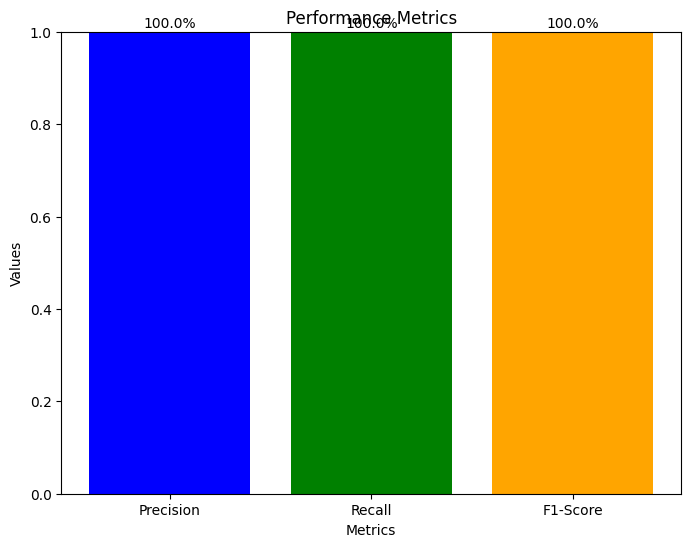

In [230]:
lstm_values = [lstm_precision, lstm_recall, f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_matrix_bars = plt.bar(metrics, lstm_values, color=[
                           'blue', 'green', 'orange'])
for bar in lstm_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim([0, 1])
plt.show()


In [231]:
# GRU
X_train_gru, X_temp_gru, y_train_gru, y_temp_gru = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_gru, X_test_gru, y_val_gru, y_test_gru = train_test_split(
    X_temp_gru, y_temp_gru, test_size=0.5, random_state=42)

X_train_reshaped_gru = X_train_gru.reshape(-1, 1, X_train_gru.shape[1])
X_val_reshaped_gru = X_val_gru.reshape(-1, 1, X_val_gru.shape[1])
X_test_reshaped_gru = X_test_gru.reshape(-1, 1, X_test_gru.shape[1])


In [232]:
gru_model = Sequential()
gru_model.add(GRU(units=64, input_shape=(
    X_train_reshaped_gru.shape[1], X_train_reshaped_gru.shape[2]), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
gru_model.add(Dropout(0.5))


In [233]:
gru_adam_optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=gru_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.6538 - accuracy: 0.0227 - val_loss: 0.1972 - val_accuracy: 0.0233
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.1136 - val_loss: 0.1726 - val_accuracy: 0.0587
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.2170 - val_loss: 0.1623 - val_accuracy: 0.0707
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.3017 - val_loss: 0.1564 - val_accuracy: 0.0680
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.3691 - val_loss: 0.1527 - val_accuracy: 0.0533
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.3987 - val_loss: 0.1491 - val_accuracy: 0.0447
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.4206 - val_loss: 0.1477 - val_accuracy: 0.0433
Epoch 

In [234]:
gru_nadam_optimizer = Nadam(learning_rate=0.001)
gru_model.compile(optimizer=gru_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_nadam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30


219/219 [==============================] - 2s 3ms/step - loss: 0.4627 - accuracy: 0.4401 - val_loss: 0.1427 - val_accuracy: 0.0060
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.4506 - val_loss: 0.1386 - val_accuracy: 0.0040
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.4354 - val_loss: 0.1395 - val_accuracy: 0.0000e+00
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.4349 - val_loss: 0.1397 - val_accuracy: 0.0033
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.4463 - val_loss: 0.1444 - val_accuracy: 0.0073
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.4443 - val_loss: 0.1403 - val_accuracy: 0.0000e+00
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.4363 - val_loss: 0.1410 - val_accuracy: 0.0000e+00
Epoch

In [235]:
gru_adagrad_optimizer = Adagrad(learning_rate=0.001)
gru_model.compile(optimizer=gru_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adagrad_history = gru_model.fit(X_train_reshaped_gru, y_train_gru,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30


219/219 [==============================] - 2s 4ms/step - loss: 0.4580 - accuracy: 0.4376 - val_loss: 0.1396 - val_accuracy: 0.0027
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.4554 - val_loss: 0.1395 - val_accuracy: 0.0020
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.4546 - val_loss: 0.1394 - val_accuracy: 0.0020
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.4440 - val_loss: 0.1394 - val_accuracy: 0.0020
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.4549 - val_loss: 0.1393 - val_accuracy: 0.0020
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.4519 - val_loss: 0.1393 - val_accuracy: 0.0027
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.4414 - val_loss: 0.1392 - val_accuracy: 0.0027
Epoch 8/30
219/21

In [236]:
gru_sgd_optimizer = SGD(learning_rate=0.001)

gru_model.compile(optimizer=gru_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_sgd_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 4ms/step - loss: 0.4544 - accuracy: 0.4406 - val_loss: 0.1391 - val_accuracy: 0.0013
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.4474 - val_loss: 0.1391 - val_accuracy: 0.0013
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.4596 - val_loss: 0.1391 - val_accuracy: 0.0013
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.4536 - val_loss: 0.1391 - val_accuracy: 0.0013
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.4499 - val_loss: 0.1391 - val_accuracy: 0.0013
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.4529 - val_loss: 0.1391 - val_accuracy: 0.0013
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.4503 - val_loss: 0.1391 - val_accuracy: 0.0013
Epoch 

In [237]:
gru_rms_optimizer = RMSprop(learning_rate=0.001)

gru_model.compile(optimizer=gru_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_rms_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 3s 4ms/step - loss: 0.4583 - accuracy: 0.4536 - val_loss: 0.1417 - val_accuracy: 0.0327
Epoch 2/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4612 - accuracy: 0.4454 - val_loss: 0.1412 - val_accuracy: 6.6667e-04
Epoch 3/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4584 - accuracy: 0.4376 - val_loss: 0.1405 - val_accuracy: 0.0133
Epoch 4/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4649 - accuracy: 0.4433 - val_loss: 0.1399 - val_accuracy: 0.0000e+00
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.4413 - val_loss: 0.1416 - val_accuracy: 0.0047
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.4396 - val_loss: 0.1416 - val_accuracy: 6.6667e-04
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.4379 - val_loss: 0.1416 - val_accuracy: 0

In [238]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped_gru, y_test_gru)
print("Test GRU Loss: ", gru_loss)
print("Test GRU Accuracy: ", gru_accuracy)


47/47 [==============================] - 0s 1ms/step - loss: 0.1542 - accuracy: 0.0073
Test GRU Loss:  0.15423667430877686
Test GRU Accuracy:  0.007333333138376474


In [239]:
gru_probs = gru_model.predict(X_test_reshaped_gru, verbose=0)
gru_classes = (gru_model.predict(
    X_test_reshaped_gru, verbose=0) > 0.5).astype("int32")

gru_probs = gru_probs[:, 0]
gru_classes = gru_classes[:, 0]

gru_accuracy = accuracy_score(y_test_gru, gru_classes)
print("Accuracy: ", gru_accuracy)

gru_precision = precision_score(y_test_gru, gru_classes)
print("Precision: ", gru_precision)

gru_recall = recall_score(y_test_gru, gru_classes)
print("Recall: ", gru_recall)

f1_score_value_gru = f1_score(y_test_gru, gru_classes)
print("F1 score: ", f1_score_value_gru)


Accuracy:  0.9553333333333334
Precision:  1.0
Recall:  0.04285714285714286
F1 score:  0.0821917808219178


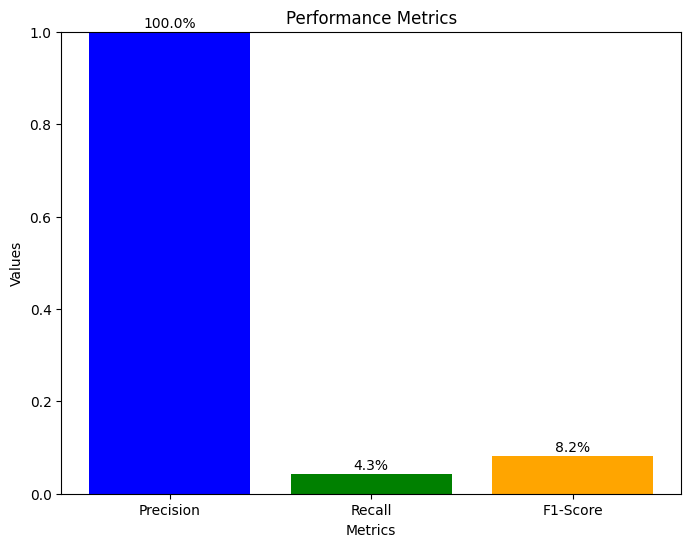

In [240]:
gru_values = [gru_precision, gru_recall, f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=[
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


In [241]:
# CNN
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train_cnn.shape)

sequence_length = X_train_cnn.shape[1]
num_features = 1

X_train_reshaped_cnn = X_train_cnn.reshape(-1, sequence_length, num_features)
X_val_reshaped_cnn = X_val_cnn.reshape(-1, sequence_length, num_features)
X_test_reshaped_cnn = X_test_cnn.reshape(-1, sequence_length, num_features)


Shape of X_train: (7000, 17)


In [269]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(
    sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=32, kernel_size=3, activation="relu"))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation="relu"))

cnn_model.add(Dropout(0.5))


In [270]:
cnn_adam_optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 4ms/step - loss: 0.5784 - accuracy: 0.2170 - val_loss: 0.2829 - val_accuracy: 0.5687
Epoch 2/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5436 - accuracy: 0.7409 - val_loss: 0.2642 - val_accuracy: 0.7840
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.8613 - val_loss: 0.2556 - val_accuracy: 0.8813
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.8964 - val_loss: 0.2468 - val_accuracy: 0.8853
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.8984 - val_loss: 0.2471 - val_accuracy: 0.9113
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.9164 - val_loss: 0.2384 - val_accuracy: 0.7380
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.9221 - val_loss: 0.2371 - val_accuracy: 0.9140
Epoch 

In [271]:
cnn_nadam_optimizer = Nadam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_nadam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.5077 - accuracy: 0.9430 - val_loss: 0.2157 - val_accuracy: 0.9393
Epoch 2/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5052 - accuracy: 0.9444 - val_loss: 0.2148 - val_accuracy: 0.9353
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.9457 - val_loss: 0.2153 - val_accuracy: 0.9513
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.9476 - val_loss: 0.2183 - val_accuracy: 0.9553
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.9461 - val_loss: 0.2146 - val_accuracy: 0.9440
Epoch 6/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5075 - accuracy: 0.9469 - val_loss: 0.2155 - val_accuracy: 0.9540
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.9471 - val_loss: 0.2162 - val_accuracy: 0.9547
Epoch 

In [272]:
cnn_adagrad_optimizer = Adagrad(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adagrad_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                    batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5096 - accuracy: 0.9487 - val_loss: 0.2138 - val_accuracy: 0.9540
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.9491 - val_loss: 0.2139 - val_accuracy: 0.9540
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.9496 - val_loss: 0.2140 - val_accuracy: 0.9540
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.9496 - val_loss: 0.2142 - val_accuracy: 0.9547
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.9496 - val_loss: 0.2143 - val_accuracy: 0.9547
Epoch 6/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5043 - accuracy: 0.9496 - val_loss: 0.2143 - val_accuracy: 0.9547
Epoch 7/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5101 - accuracy: 0.9499 - val_loss: 0.2143 - val_accuracy: 0.9547
Epoch 

In [273]:
cnn_sgd_optimizer = SGD(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_sgd_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5067 - accuracy: 0.9497 - val_loss: 0.2148 - val_accuracy: 0.9547
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.9493 - val_loss: 0.2148 - val_accuracy: 0.9547
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.9494 - val_loss: 0.2148 - val_accuracy: 0.9547
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.9499 - val_loss: 0.2148 - val_accuracy: 0.9547
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.9491 - val_loss: 0.2148 - val_accuracy: 0.9547
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.9497 - val_loss: 0.2148 - val_accuracy: 0.9547
Epoch 7/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5077 - accuracy: 0.9494 - val_loss: 0.2148 - val_accuracy: 0.9547
Epoch 

In [274]:
cnn_rms_optimizer = RMSprop(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_rms_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5083 - accuracy: 0.9471 - val_loss: 0.2197 - val_accuracy: 0.9553
Epoch 2/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5075 - accuracy: 0.9464 - val_loss: 0.2191 - val_accuracy: 0.9553
Epoch 3/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.9467 - val_loss: 0.2178 - val_accuracy: 0.9553
Epoch 4/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5089 - accuracy: 0.9473 - val_loss: 0.2188 - val_accuracy: 0.9553
Epoch 5/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5085 - accuracy: 0.9476 - val_loss: 0.2162 - val_accuracy: 0.9513
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.9467 - val_loss: 0.2180 - val_accuracy: 0.9553
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.9479 - val_loss: 0.2166 - val_accuracy: 0.9520
Epoch 

In [275]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped_cnn, y_test_cnn)
print("Test CNN Loss: ", cnn_loss)
print("Test CNN Accuracy: ", cnn_accuracy)


47/47 [==============================] - 0s 1ms/step - loss: 0.2328 - accuracy: 0.9527
Test CNN Loss:  0.23275935649871826
Test CNN Accuracy:  0.9526666402816772


In [276]:
cnn_probs = cnn_model.predict(X_test_reshaped_cnn, verbose=0)
cnn_classes = (cnn_model.predict(
    X_test_reshaped_cnn, verbose=0) > 0.5).astype("int32")

cnn_probs = cnn_probs[:, 0]
cnn_classes = cnn_classes[:, 0]

cnn_accuracy = accuracy_score(y_test_cnn, cnn_classes)
print("Accuracy: ", cnn_accuracy)

cnn_precision = precision_score(y_test_cnn, cnn_classes, zero_division=1)
print("Precision: ", cnn_precision)

cnn_recall = recall_score(y_test_cnn, cnn_classes, zero_division=1)
print("Recall: ", cnn_recall)

f1_score_value_cnn = f1_score(y_test_cnn, cnn_classes, zero_division=1)
print("F1 score: ", f1_score_value_cnn)


Accuracy:  0.996
Precision:  1.0
Recall:  0.9142857142857143
F1 score:  0.955223880597015


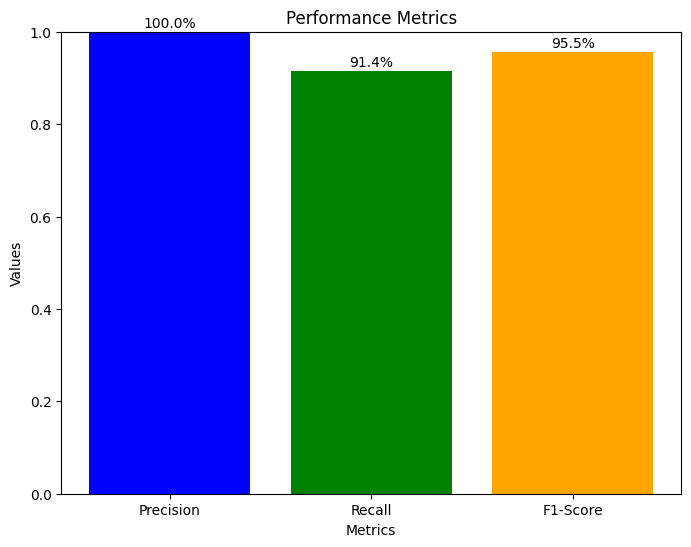

In [277]:
cnn_values = [cnn_precision, cnn_recall, f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=[
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


In [251]:
# # ----- LSTM Adam Loss -----
# plt.plot(lstm_adam_history.history['loss'],
#          label="Adam Training Loss", color='blue')
# plt.plot(lstm_adam_history.history['val_loss'],
#          label="Adam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM Nadam Loss -----
# plt.plot(lstm_nadam_history.history['loss'],
#          label="Nadam Training Loss", color='blue')
# plt.plot(lstm_nadam_history.history['val_loss'],
#          label="Nadam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM Adgrad Loss -----
# plt.plot(lstm_adagrad_history.history['loss'],
#          label="Adagrad Training Loss", color='blue')
# plt.plot(lstm_adagrad_history.history['val_loss'],
#          label="Adagrad Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM SGD Loss -----
# plt.plot(lstm_sgd_history.history['loss'],
#          label="SGD Training Loss", color='blue')
# plt.plot(lstm_sgd_history.history['val_loss'],
#          label="SGD Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM RMSProp Loss -----
# plt.plot(lstm_rms_history.history['loss'],
#          label="RMS Training Loss", color='blue')
# plt.plot(lstm_rms_history.history['val_loss'],
#          label="RMS Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


# # plt.figure(figsize=(12, 6))

# # lstm_adam_h = np.mean(lstm_adam_history.history['loss'])
# # lstm_nadam_h = np.mean(lstm_nadam_history.history['loss'])
# # lstm_adagrad_h = np.mean(lstm_adagrad_history.history['loss'])
# # lstm_sgd_h = np.mean(lstm_sgd_history.history['loss'])
# # lstm_rms_h = np.mean(lstm_rms_history.history['loss'])


# # lstm_optimizers = [lstm_adam_h, lstm_nadam_h,
# #                    lstm_adagrad_h, lstm_sgd_h, lstm_rms_h]

# # plt.plot(lstm_optimizers, label="Loss", color='blue')
# # # plt.plot(lstm_optimizers, label="Validation Loss", color='lightblue')

# # plt.title("Training and Validation loss in LSTM")
# # plt.xlabel("Epoch")
# # plt.ylabel("Loss")
# # plt.legend()
# # plt.grid(True)
# # plt.show()


In [252]:
# # ----- LSTM Adam Accuracy -----
# plt.plot(lstm_adam_history.history['accuracy'],
#          label="Adam Training Accuracy", color='blue')
# plt.plot(lstm_adam_history.history['val_accuracy'],
#          label="Adam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM Nadam Accuracy -----
# plt.plot(lstm_nadam_history.history['accuracy'],
#          label="Nadam Training Accuracy", color='blue')
# plt.plot(lstm_nadam_history.history['val_accuracy'],
#          label="Nadam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM Adgrad Accuracy -----
# plt.plot(lstm_adagrad_history.history['accuracy'],
#          label="Adagrad Training Accuracy", color='blue')
# plt.plot(lstm_adagrad_history.history['val_accuracy'],
#          label="Adagrad Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM SGD Accuracy -----
# plt.plot(lstm_sgd_history.history['accuracy'],
#          label="SGD Training Accuracy", color='blue')
# plt.plot(lstm_sgd_history.history['val_accuracy'],
#          label="SGD Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM RMSProp Accuracy -----
# plt.plot(lstm_rms_history.history['accuracy'],
#          label="RMS Training Accuracy", color='blue')
# plt.plot(lstm_rms_history.history['val_accuracy'],
#          label="RMS Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [253]:
# # ----- GRU Adam Loss -----
# plt.plot(gru_adam_history.history['loss'],
#          label="Adam Training Loss", color='blue')
# plt.plot(gru_adam_history.history['val_loss'],
#          label="Adam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU Nadam Loss -----
# plt.plot(gru_nadam_history.history['loss'],
#          label="Nadam Training Loss", color='blue')
# plt.plot(gru_nadam_history.history['val_loss'],
#          label="Nadam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU Adgrad Loss -----
# plt.plot(gru_adagrad_history.history['loss'],
#          label="Adagrad Training Loss", color='blue')
# plt.plot(gru_adagrad_history.history['val_loss'],
#          label="Adagrad Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU SGD Loss -----
# plt.plot(gru_sgd_history.history['loss'],
#          label="SGD Training Loss", color='blue')
# plt.plot(gru_sgd_history.history['val_loss'],
#          label="SGD Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU RMSProp Loss -----
# plt.plot(gru_rms_history.history['loss'],
#          label="RMS Training Loss", color='blue')
# plt.plot(gru_rms_history.history['val_loss'],
#          label="RMS Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [254]:
# # ----- GRU Adam Accuracy -----
# plt.plot(gru_adam_history.history['accuracy'],
#          label="Adam Training Accuracy", color='blue')
# plt.plot(gru_adam_history.history['val_accuracy'],
#          label="Adam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU Nadam Accuracy -----
# plt.plot(gru_nadam_history.history['accuracy'],
#          label="Nadam Training Accuracy", color='blue')
# plt.plot(gru_nadam_history.history['val_accuracy'],
#          label="Nadam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU Adgrad Accuracy -----
# plt.plot(gru_adagrad_history.history['accuracy'],
#          label="Adagrad Training Accuracy", color='blue')
# plt.plot(gru_adagrad_history.history['val_accuracy'],
#          label="Adagrad Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU SGD Accuracy -----
# plt.plot(gru_sgd_history.history['accuracy'],
#          label="SGD Training Accuracy", color='blue')
# plt.plot(gru_sgd_history.history['val_accuracy'],
#          label="SGD Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU RMSProp Accuracy -----
# plt.plot(gru_rms_history.history['accuracy'],
#          label="RMS Training Accuracy", color='blue')
# plt.plot(gru_rms_history.history['val_accuracy'],
#          label="RMS Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [255]:
# # ----- CNN1D Adam Loss -----
# plt.plot(cnn_adam_history.history['loss'],
#          label="Adam Training Loss", color='blue')
# plt.plot(cnn_adam_history.history['val_loss'],
#          label="Adam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1D Nadam Loss -----
# plt.plot(cnn_nadam_history.history['loss'],
#          label="Nadam Training Loss", color='blue')
# plt.plot(cnn_nadam_history.history['val_loss'],
#          label="Nadam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1D Adgrad Loss -----
# plt.plot(cnn_adagrad_history.history['loss'],
#          label="Adagrad Training Loss", color='blue')
# plt.plot(cnn_adagrad_history.history['val_loss'],
#          label="Adagrad Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1D SGD Loss -----
# plt.plot(cnn_sgd_history.history['loss'],
#          label="SGD Training Loss", color='blue')
# plt.plot(cnn_sgd_history.history['val_loss'],
#          label="SGD Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1D RMSProp Loss -----
# plt.plot(cnn_rms_history.history['loss'],
#          label="RMS Training Loss", color='blue')
# plt.plot(cnn_rms_history.history['val_loss'],
#          label="RMS Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [256]:
# # ----- CNN1d Adam Accuracy -----
# plt.plot(cnn_adam_history.history['accuracy'],
#          label="Adam Training Accuracy", color='blue')
# plt.plot(cnn_adam_history.history['val_accuracy'],
#          label="Adam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1d Nadam Accuracy -----
# plt.plot(cnn_nadam_history.history['accuracy'],
#          label="Nadam Training Accuracy", color='blue')
# plt.plot(cnn_nadam_history.history['val_accuracy'],
#          label="Nadam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1d Adgrad Accuracy -----
# plt.plot(cnn_adagrad_history.history['accuracy'],
#          label="Adagrad Training Accuracy", color='blue')
# plt.plot(cnn_adagrad_history.history['val_accuracy'],
#          label="Adagrad Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1d SGD Accuracy -----
# plt.plot(cnn_sgd_history.history['accuracy'],
#          label="SGD Training Accuracy", color='blue')
# plt.plot(cnn_sgd_history.history['val_accuracy'],
#          label="SGD Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1d RMSProp Accuracy -----
# plt.plot(cnn_rms_history.history['accuracy'],
#          label="RMS Training Accuracy", color='blue')
# plt.plot(cnn_rms_history.history['val_accuracy'],
#          label="RMS Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [257]:
# plt.figure(figsize=(12, 6))

# cnn_adam_h = np.mean(cnn_adam_history.history['loss'])
# cnn_nadam_h = np.mean(cnn_nadam_history.history['loss'])
# cnn_adagrad_h = np.mean(cnn_adagrad_history.history['loss'])
# cnn_sgd_h = np.mean(cnn_sgd_history.history['loss'])
# cnn_rms_h = np.mean(cnn_rms_history.history['loss'])

# cnn_adam_h_v = np.mean(cnn_adam_history.history['val_loss'])
# cnn_nadam_h_v = np.mean(cnn_nadam_history.history['val_loss'])
# cnn_adagrad_h_v = np.mean(cnn_adagrad_history.history['val_loss'])
# cnn_sgd_h_v = np.mean(cnn_sgd_history.history['val_loss'])
# cnn_rms_h_v = np.mean(cnn_rms_history.history['val_loss'])

# cnn_optimizers = [cnn_adam_h, cnn_nadam_h,
#                   cnn_adagrad_h, cnn_sgd_h, cnn_rms_h]
# cnn_optimizers_v = [cnn_adam_h_v, cnn_nadam_h_v,
#                     cnn_adagrad_h_v, cnn_sgd_h_v, cnn_rms_h_v]

# plt.plot(cnn_optimizers, label="Loss", color='blue')
# plt.plot(cnn_optimizers_v, label="Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [258]:
# plt.figure(figsize=(12, 6))

# cnn_adam_acc = np.mean(cnn_adam_history.history['accuracy'])
# cnn_nadam_acc = np.mean(cnn_nadam_history.history['accuracy'])
# cnn_adagrad_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_sgd_acc = np.mean(cnn_sgd_history.history['accuracy'])
# cnn_rms_acc = np.mean(cnn_rms_history.history['accuracy'])

# cnn_adam_val_acc = np.mean(cnn_adam_history.history['val_accuracy'])
# cnn_nadam_val_acc = np.mean(cnn_nadam_history.history['val_accuracy'])
# cnn_adagrad_val_acc = np.mean(cnn_adagrad_history.history['val_accuracy'])
# cnn_sgd_val_acc = np.mean(cnn_sgd_history.history['val_accuracy'])
# cnn_rms_val_acc = np.mean(cnn_rms_history.history['val_accuracy'])


# cnn_optimizers_acc = [cnn_adam_acc, cnn_nadam_acc,
#                       cnn_adagrad_acc, cnn_sgd_acc, cnn_rms_acc]
# cnn_optimizers_val_acc = [cnn_adam_val_acc, cnn_nadam_val_acc,
#                           cnn_adagrad_val_acc, cnn_sgd_val_acc, cnn_rms_val_acc]

# plt.plot(cnn_optimizers_acc, label="Accuracy", color='blue')
# plt.plot(cnn_optimizers_val_acc, label="Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [278]:
models = ['LSTM', 'GRU', '1D-CNN']


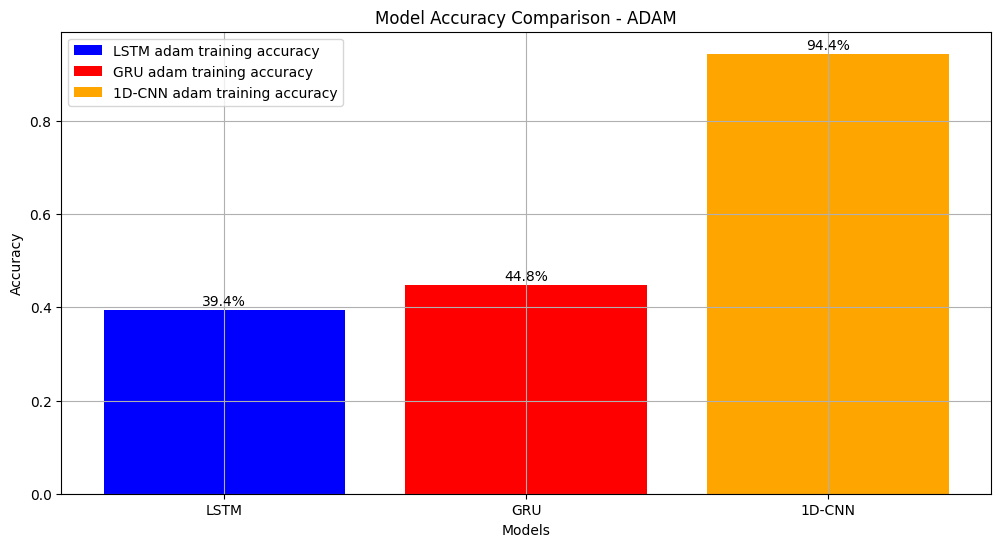

In [293]:
plt.figure(figsize=(12, 6))

# lstm_adam_train_acc = np.mean(lstm_adam_history.history["accuracy"])
# lstm_adam_val_acc = np.mean(lstm_adam_history.history["val_accuracy"])

# gru_adam_train_acc = np.mean(gru_adam_history.history["accuracy"])
# gru_adam_val_acc = np.mean(gru_adam_history.history["val_accuracy"])

# cnn_adam_train_acc = np.mean(cnn_adam_history.history["accuracy"])
# cnn_adam_val_acc = np.mean(cnn_adam_history.history["val_accuracy"])

adam_histories = [lstm_adam_history, gru_adam_history, cnn_adam_history]

# adam_accuracies = [lstm_adam_train_acc, gru_adam_train_acc, cnn_adam_train_acc]

adam_accuracies = [a_history.history['accuracy'][-1]
                   for a_history in adam_histories]

adam_bar = plt.bar(models, adam_accuracies, label=['LSTM adam training accuracy',
                                                   'GRU adam training accuracy', '1D-CNN adam training accuracy'], color=['blue', 'red', 'orange'])

for bar in adam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title("Model Accuracy Comparison - ADAM")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


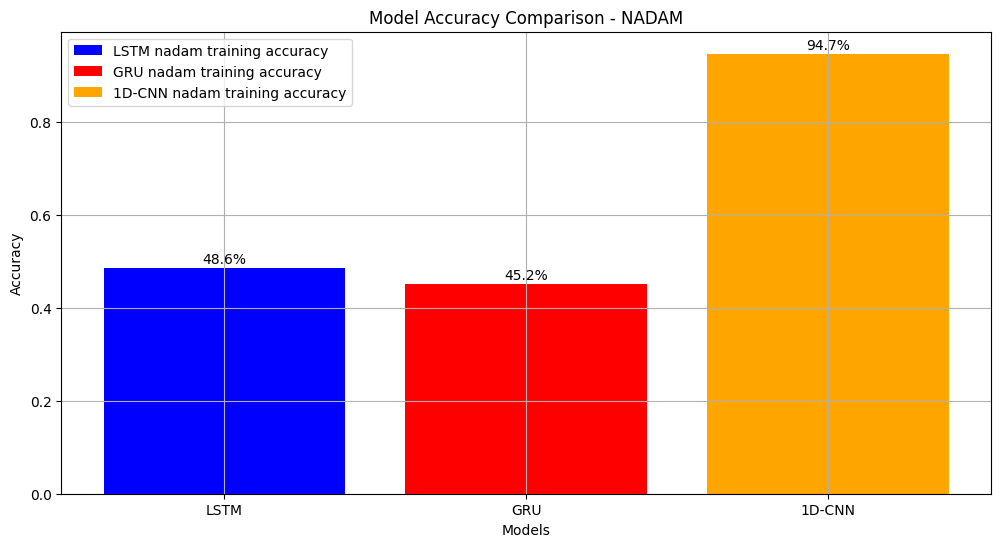

In [294]:
plt.figure(figsize=(12, 6))

# lstm_nadam_train_acc = np.mean(lstm_nadam_history.history["accuracy"])
# lstm_nadam_val_acc = lstm_nadam_history.history["val_accuracy"]

# gru_nadam_train_acc = np.mean(gru_nadam_history.history["accuracy"])
# gru_nadam_val_acc = gru_nadam_history.history["val_accuracy"]

# cnn_nadam_train_acc = np.mean(cnn_nadam_history.history["accuracy"])
# cnn_nadam_val_acc = cnn_nadam_history.history["val_accuracy"]

# nadam_accuracies = [lstm_nadam_train_acc,
#                     gru_nadam_train_acc, cnn_nadam_train_acc]

nadam_histories = [lstm_nadam_history, gru_nadam_history, cnn_nadam_history]

nadam_accuracies = [n_history.history['accuracy'][-1]
                    for n_history in nadam_histories]

nadam_bar = plt.bar(models, nadam_accuracies, label=['LSTM nadam training accuracy',
                                                     'GRU nadam training accuracy', '1D-CNN nadam training accuracy'], color=['blue', 'red', 'orange'])

for bar in nadam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title('Model Accuracy Comparison - NADAM')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


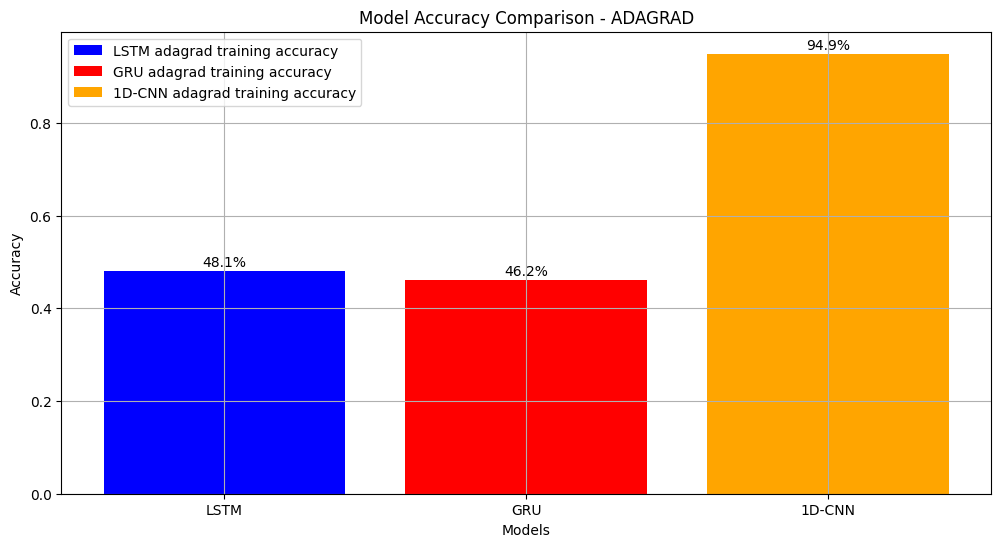

In [297]:
plt.figure(figsize=(12, 6))

# lstm_adagrad_train_acc = np.mean(lstm_adagrad_history.history['accuracy'])
# lstm_adagrad_val_acc = lstm_adagrad_history.history['val_accuracy']

# gru_adagrad_train_acc = np.mean(gru_adagrad_history.history['accuracy'])
# gru_adagrad_val_acc = gru_adagrad_history.history['val_accuracy']

# cnn_adagrad_train_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_adagrad_val_acc = cnn_adagrad_history.history['val_accuracy']

# adagrad_accuracies = [lstm_adagrad_train_acc,
#                       gru_adagrad_train_acc, cnn_adagrad_train_acc]

adagrad_histories = [lstm_adagrad_history,
                     gru_adagrad_history, cnn_adagrad_history]

adagrad_accuracies = [ad_history.history['accuracy'][-1]
                      for ad_history in adagrad_histories]

adagrad_bar = plt.bar(models, adagrad_accuracies,  label=['LSTM adagrad training accuracy',
                                                          'GRU adagrad training accuracy', '1D-CNN adagrad training accuracy'], color=['blue', 'red',  'orange'])

for bar in adagrad_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title('Model Accuracy Comparison - ADAGRAD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


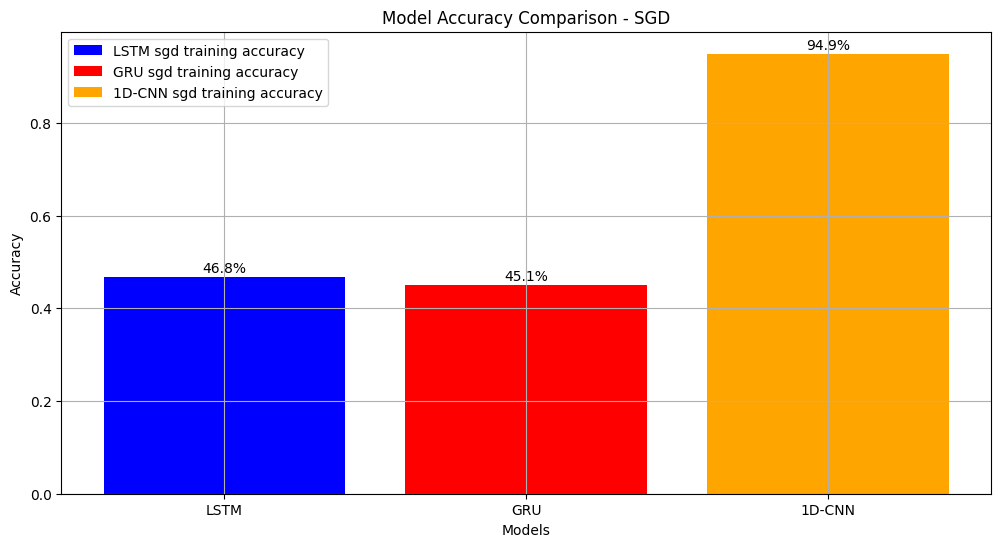

In [298]:
plt.figure(figsize=(12, 6))

# lstm_sgd_train_acc = np.mean(lstm_sgd_history.history['accuracy'])

# gru_sgd_train_acc = np.mean(gru_sgd_history.history['accuracy'])

# cnn_sgd_train_acc = np.mean(cnn_sgd_history.history['accuracy'])

# sgd_accuracies = [lstm_sgd_train_acc,
#                   gru_sgd_train_acc, cnn_sgd_train_acc]

sgd_histories = [lstm_sgd_history, gru_sgd_history, cnn_sgd_history]

sgd_accuracies = [sgd_history.history['accuracy'][-1]
                  for sgd_history in sgd_histories]

sgd_bar = plt.bar(models, sgd_accuracies,  label=['LSTM sgd training accuracy',
                                                  'GRU sgd training accuracy', '1D-CNN sgd training accuracy'], color=['blue', 'red',  'orange'])

for bar in sgd_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title('Model Accuracy Comparison - SGD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


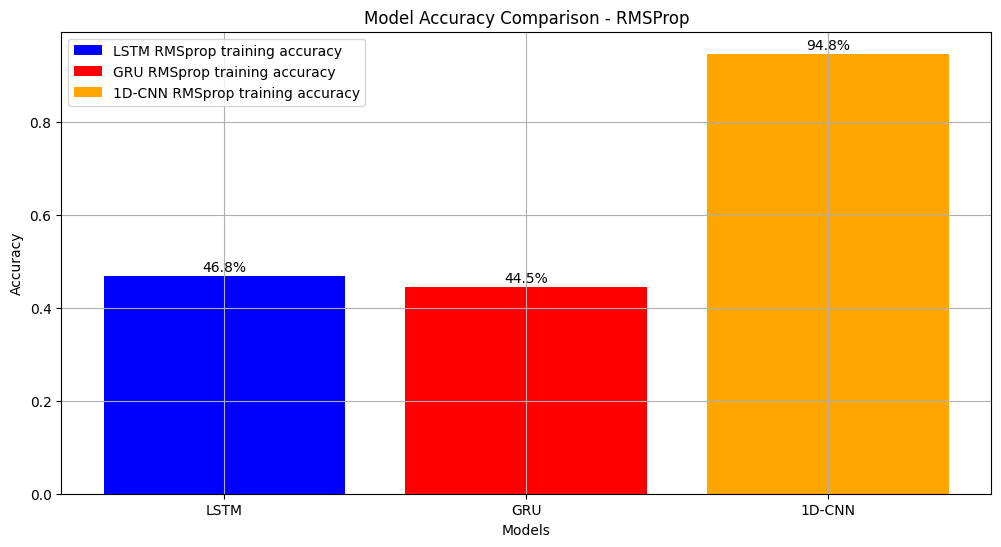

In [299]:
plt.figure(figsize=(12, 6))

# lstm_rms_train_acc = np.mean(lstm_rms_history.history['accuracy'])
# gru_rms_train_acc = np.mean(gru_rms_history.history['accuracy'])
# cnn_rms_train_acc = np.mean(cnn_rms_history.history['accuracy'])

# rms_accuracies = [lstm_rms_train_acc, gru_rms_train_acc, cnn_rms_train_acc]

rms_histories = [lstm_rms_history, gru_rms_history, cnn_rms_history]

rms_accuracies = [rms_history.history['accuracy'][-1]
                  for rms_history in rms_histories]

rms_bar = plt.bar(models, rms_accuracies, label=['LSTM RMSprop training accuracy',
                                                 'GRU RMSprop training accuracy', '1D-CNN RMSprop training accuracy'], color=['blue', 'red',  'orange'])

for bar in rms_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title('Model Accuracy Comparison - RMSProp')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


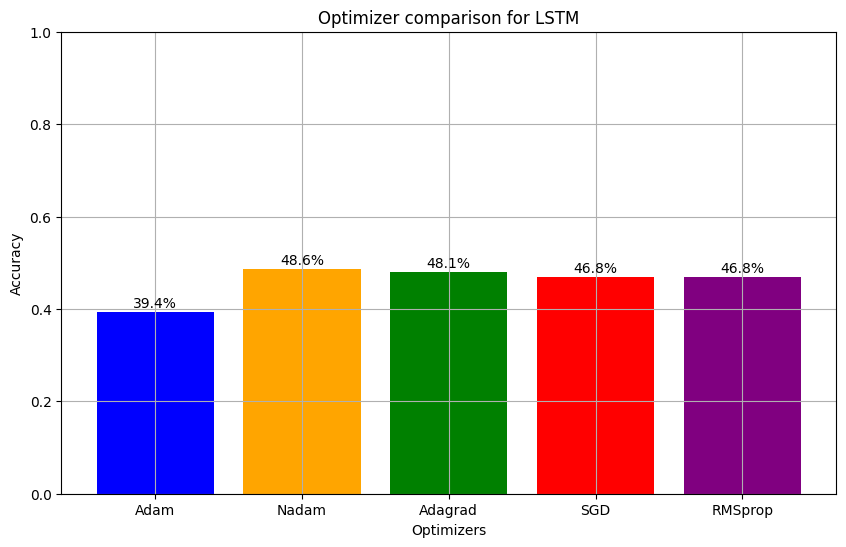

In [292]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
lstm_histories = [lstm_adam_history, lstm_nadam_history,
                  lstm_adagrad_history, lstm_sgd_history, lstm_rms_history]

plt.figure(figsize=(10, 6))

lstm_accuracies = [history.history['accuracy'][-1]
                   for history in lstm_histories]

lstm_bars = plt.bar(optimizers, lstm_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for LSTM")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in lstm_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.show()


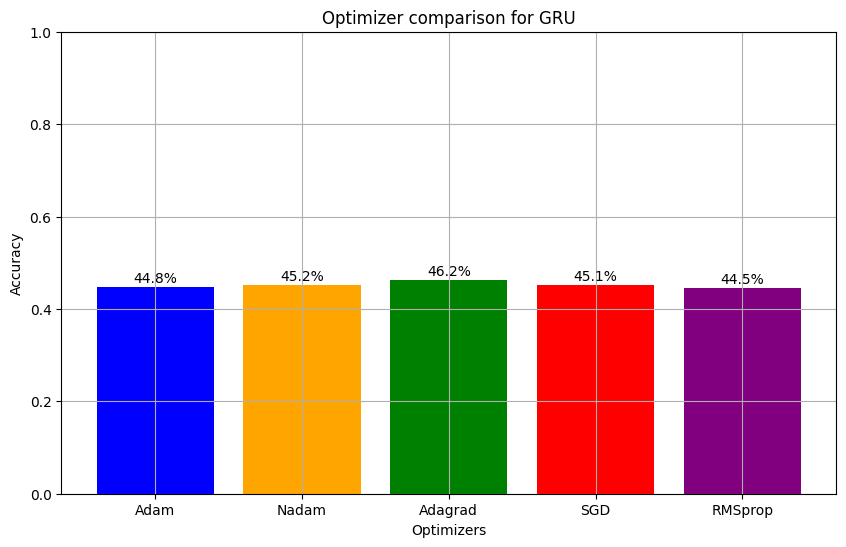

In [285]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
gru_histories = [gru_adam_history, gru_nadam_history,
                 gru_adagrad_history, gru_sgd_history, gru_rms_history]

plt.figure(figsize=(10, 6))

gru_accuracies = [history.history['accuracy'][-1] for history in gru_histories]

gru_bars = plt.bar(optimizers, gru_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for GRU")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in gru_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.show()


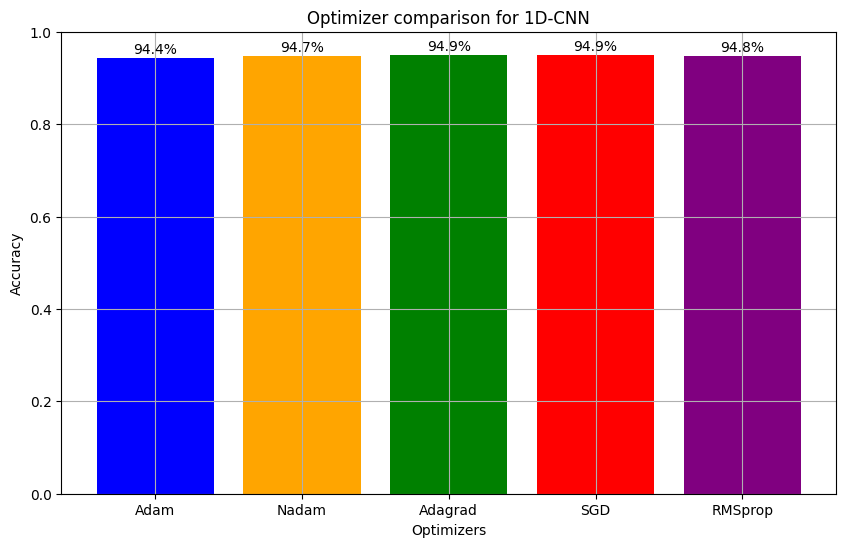

In [286]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
cnn_histories = [cnn_adam_history, cnn_nadam_history,
                 cnn_adagrad_history, cnn_sgd_history, cnn_rms_history]

plt.figure(figsize=(10, 6))

cnn_accuracies = [history.history['accuracy'][-1] for history in cnn_histories]

cnn_bars = plt.bar(optimizers, cnn_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for 1D-CNN")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in cnn_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.show()
